# Introduction to Computer Vision: Plant Seedlings Classification - Sai Deepak

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [86]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix 

## Loading the dataset

In [87]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
#from google.colab import drive
#drive.mount('/content/drive')

images = np.load('images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [88]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


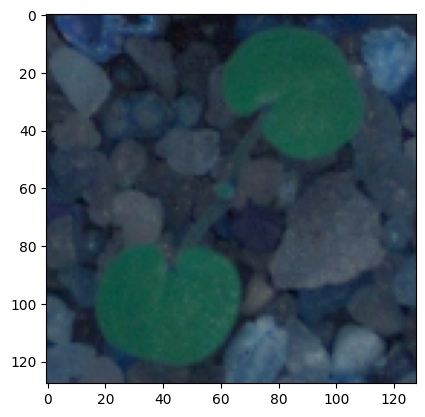

In [89]:
plt.imshow(images[5])

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [90]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

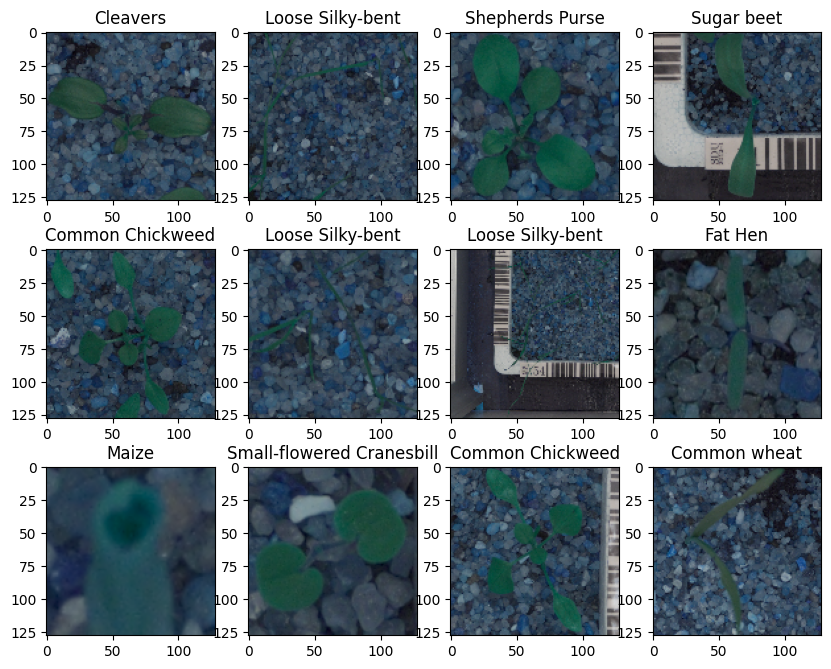

In [91]:
plot_images(images,labels)

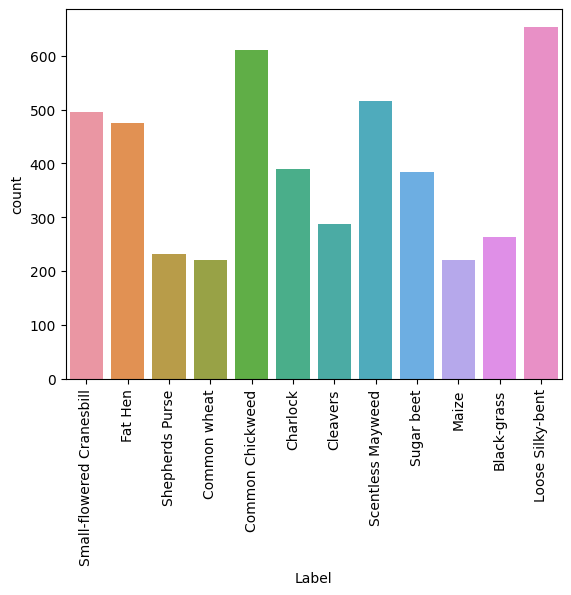

In [92]:
 sns.countplot(labels, x = "Label")
 plt.xticks(rotation='vertical');

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [93]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [94]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

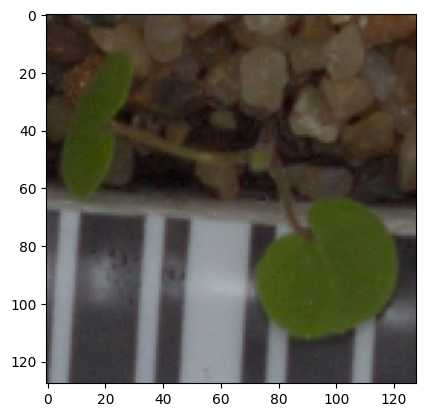

In [95]:
plt.imshow(images[10])

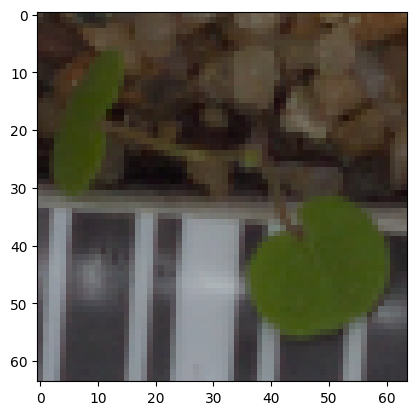

In [96]:
plt.imshow(images_decreased[10])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [97]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [98]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [99]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [100]:
y_train_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [101]:
y_test_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

### Data Normalization

In [102]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [152]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [153]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [155]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [156]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/50
121/121 - 4s - loss: 2.4589 - accuracy: 0.1279 - val_loss: 2.4122 - val_accuracy: 0.1822 - 4s/epoch - 31ms/step
Epoch 2/50
121/121 - 3s - loss: 2.3573 - accuracy: 0.1846 - val_loss: 2.1751 - val_accuracy: 0.2710 - 3s/epoch - 28ms/step
Epoch 3/50
121/121 - 3s - loss: 2.0496 - accuracy: 0.2828 - val_loss: 1.7563 - val_accuracy: 0.4766 - 3s/epoch - 28ms/step
Epoch 4/50
121/121 - 3s - loss: 1.7861 - accuracy: 0.3707 - val_loss: 1.5065 - val_accuracy: 0.4836 - 3s/epoch - 28ms/step
Epoch 5/50
121/121 - 4s - loss: 1.6520 - accuracy: 0.4084 - val_loss: 1.5741 - val_accuracy: 0.4486 - 4s/epoch - 29ms/step
Epoch 6/50
121/121 - 3s - loss: 1.6043 - accuracy: 0.4320 - val_loss: 1.3401 - val_accuracy: 0.5864 - 3s/epoch - 28ms/step
Epoch 7/50
121/121 - 4s - loss: 1.5471 - accuracy: 0.4406 - val_loss: 1.3008 - val_accuracy: 0.5794 - 4s/epoch - 36ms/step
Epoch 8/50
121/121 - 4s - loss: 1.5061 - accuracy: 0.4611 - val_loss: 1.2878 - val_accuracy: 0.5794 - 4s/epoch - 32ms/step
Epoch 9/50
121/1

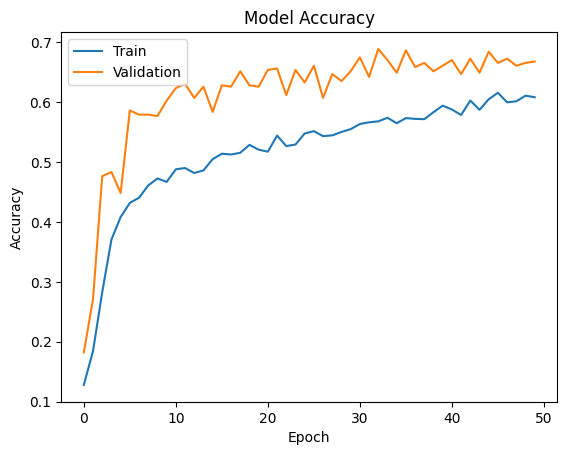

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* Accuracy of the model is good and surprsingly accuracy of the validation data more than the training data

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.2129 - accuracy: 0.6589 - 139ms/epoch - 9ms/step


* Accuracy of the test data is also good. Model doesn not overfit as the accuracy pretty much among training, validation and testing datasets

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

In [ ]:
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 9ms/step


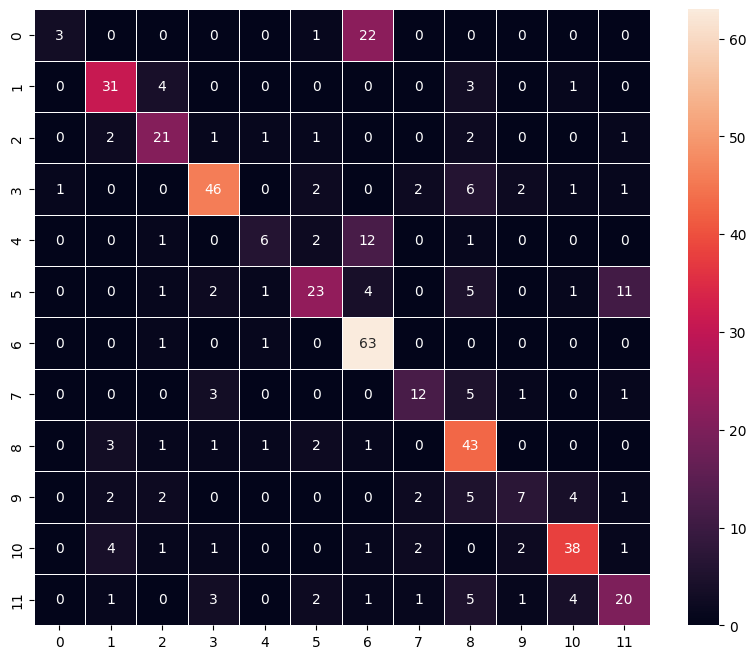

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

* Huge number of Class 0 are misclasified
* Significant number of Class 5 are misclassified.
* Class 6 is well classified

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1= Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam()

# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0 )

In [ ]:
history_2= model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=75,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            callbacks = [reduce_lr]
)

Epoch 1/75
121/121 - 4s - loss: 2.4589 - accuracy: 0.1279 - val_loss: 2.4122 - val_accuracy: 0.1822 - lr: 0.0010 - 4s/epoch - 32ms/step
Epoch 2/75
121/121 - 3s - loss: 2.3573 - accuracy: 0.1846 - val_loss: 2.1751 - val_accuracy: 0.2710 - lr: 0.0010 - 3s/epoch - 28ms/step
Epoch 3/75
121/121 - 3s - loss: 2.0496 - accuracy: 0.2828 - val_loss: 1.7563 - val_accuracy: 0.4766 - lr: 0.0010 - 3s/epoch - 28ms/step
Epoch 4/75
121/121 - 3s - loss: 1.7861 - accuracy: 0.3707 - val_loss: 1.5065 - val_accuracy: 0.4836 - lr: 0.0010 - 3s/epoch - 29ms/step
Epoch 5/75
121/121 - 3s - loss: 1.6520 - accuracy: 0.4084 - val_loss: 1.5741 - val_accuracy: 0.4486 - lr: 0.0010 - 3s/epoch - 28ms/step
Epoch 6/75
121/121 - 3s - loss: 1.6043 - accuracy: 0.4320 - val_loss: 1.3401 - val_accuracy: 0.5864 - lr: 0.0010 - 3s/epoch - 28ms/step
Epoch 7/75
121/121 - 3s - loss: 1.5471 - accuracy: 0.4406 - val_loss: 1.3008 - val_accuracy: 0.5794 - lr: 0.0010 - 3s/epoch - 28ms/step
Epoch 8/75
121/121 - 3s - loss: 1.5061 - accurac

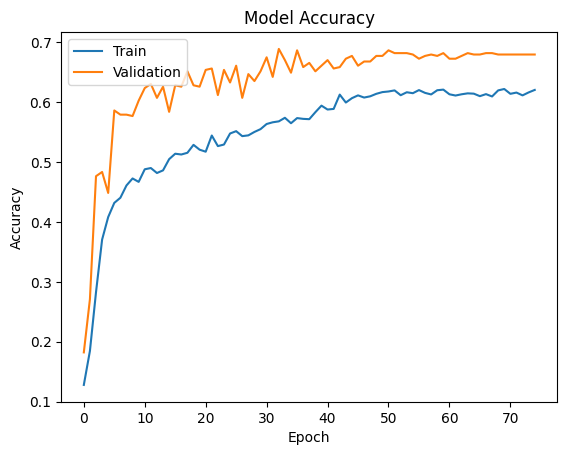

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* Even with increased epochs and with reduce learning rate, model performance remained pretty much same as orgincal model

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1496 - accuracy: 0.6653 - 134ms/epoch - 9ms/step


* Test accuracy pretty much remained same as previous model

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:

train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',
                              horizontal_flip = True
                              )

In [ ]:
# Intializing a sequential model
model2= Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam()

# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint

mc = ModelCheckpoint(
    "model2.h5",
    monitor = "val_accuracy",
    patience = 5,
    verbose = 1,
    save_best_only = True
)

In [ ]:
# Epochs
epochs = 85

# Batch size
batch_size = 64

history_3 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    # verbose=1,
                    callbacks = [reduce_lr, mc])

Epoch 1/85
60/60 [==============================] - ETA: 0s - loss: 2.4716 - accuracy: 0.1147
Epoch 1: val_accuracy improved from -inf to 0.13785, saving model to model2.h5
60/60 [==============================] - 4s 57ms/step - loss: 2.4716 - accuracy: 0.1147 - val_loss: 2.4490 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/85
 2/60 [>.............................] - ETA: 3s - loss: 2.4679 - accuracy: 0.1016

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - ETA: 0s - loss: 2.4422 - accuracy: 0.1390
Epoch 2: val_accuracy improved from 0.13785 to 0.23598, saving model to model2.h5
60/60 [==============================] - 3s 58ms/step - loss: 2.4422 - accuracy: 0.1390 - val_loss: 2.3633 - val_accuracy: 0.2360 - lr: 0.0010
Epoch 3/85
60/60 [==============================] - ETA: 0s - loss: 2.2869 - accuracy: 0.2260
Epoch 3: val_accuracy improved from 0.23598 to 0.32009, saving model to model2.h5
60/60 [==============================] - 4s 60ms/step - loss: 2.2869 - accuracy: 0.2260 - val_loss: 2.1331 - val_accuracy: 0.3201 - lr: 0.0010
Epoch 4/85
60/60 [==============================] - ETA: 0s - loss: 2.1197 - accuracy: 0.2781
Epoch 4: val_accuracy improved from 0.32009 to 0.37617, saving model to model2.h5
60/60 [==============================] - 4s 59ms/step - loss: 2.1197 - accuracy: 0.2781 - val_loss: 1.9165 - val_accuracy: 0.3762 - lr: 0.0010
Epoch 5/85
60/60 [==============================] - ET

*  With DataAugmenation , Validation Accuracy is improved. Suprisingly that is much higher than the training accuracy.

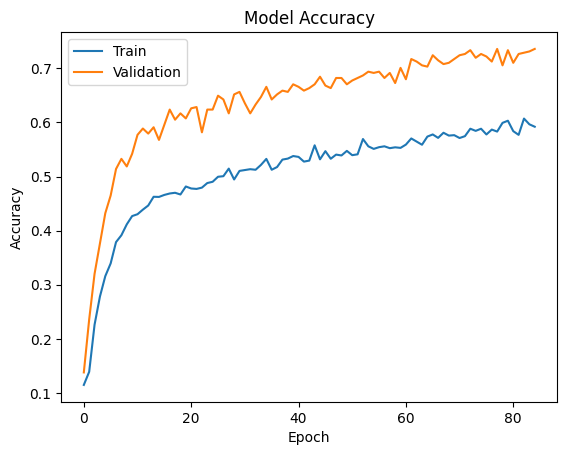

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* We do need to use saved model as Validation accuracy reamained pretty much same the last time model saved

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8654 - accuracy: 0.7432 - 135ms/epoch - 9ms/step


*Test accurcy is also improved.

# Transfer Learning using VGG16

In [139]:
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [140]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [142]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [143]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 12)                2

* Trianable Params are 66572 out of 14714688

In [144]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(
    monitor = "val_accuracy",
    patience = 10,
    verbose = 1
)

mc = ModelCheckpoint(
    "new_model.h5",
    monitor = "val_accuracy",
    patience = 10,
    verbose = 0,
    save_best_only = True
)

In [145]:


history_vgg16 = new_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=64,
            verbose=2,
            callbacks = [es, mc]
)

Epoch 1/50
61/61 - 24s - loss: 2.3361 - accuracy: 0.1846 - val_loss: 2.1407 - val_accuracy: 0.2827 - 24s/epoch - 389ms/step
Epoch 2/50
61/61 - 24s - loss: 2.0466 - accuracy: 0.3034 - val_loss: 1.9424 - val_accuracy: 0.3224 - 24s/epoch - 386ms/step
Epoch 3/50
61/61 - 24s - loss: 1.8548 - accuracy: 0.3590 - val_loss: 1.7906 - val_accuracy: 0.3762 - 24s/epoch - 385ms/step
Epoch 4/50
61/61 - 23s - loss: 1.7367 - accuracy: 0.3806 - val_loss: 1.6744 - val_accuracy: 0.4252 - 23s/epoch - 384ms/step
Epoch 5/50
61/61 - 23s - loss: 1.6166 - accuracy: 0.4318 - val_loss: 1.5833 - val_accuracy: 0.4650 - 23s/epoch - 384ms/step
Epoch 6/50
61/61 - 23s - loss: 1.5278 - accuracy: 0.4640 - val_loss: 1.5428 - val_accuracy: 0.4603 - 23s/epoch - 384ms/step
Epoch 7/50
61/61 - 24s - loss: 1.4616 - accuracy: 0.4840 - val_loss: 1.5094 - val_accuracy: 0.4743 - 24s/epoch - 386ms/step
Epoch 8/50
61/61 - 24s - loss: 1.4156 - accuracy: 0.4934 - val_loss: 1.4711 - val_accuracy: 0.4720 - 24s/epoch - 386ms/step
Epoch 9/

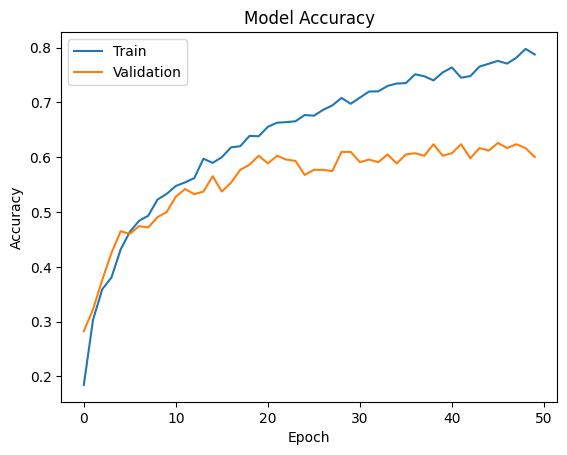

In [146]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


* With VGG16, model is overfitting

In [148]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 1.4403 - accuracy: 0.6147 - 3s/epoch - 181ms/step


* Test accuracyis also at60 %

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

* Among all models, Model with Data Augumentation shown better results with 75% Accuracy

15/15 [==============================] - 0s 8ms/step


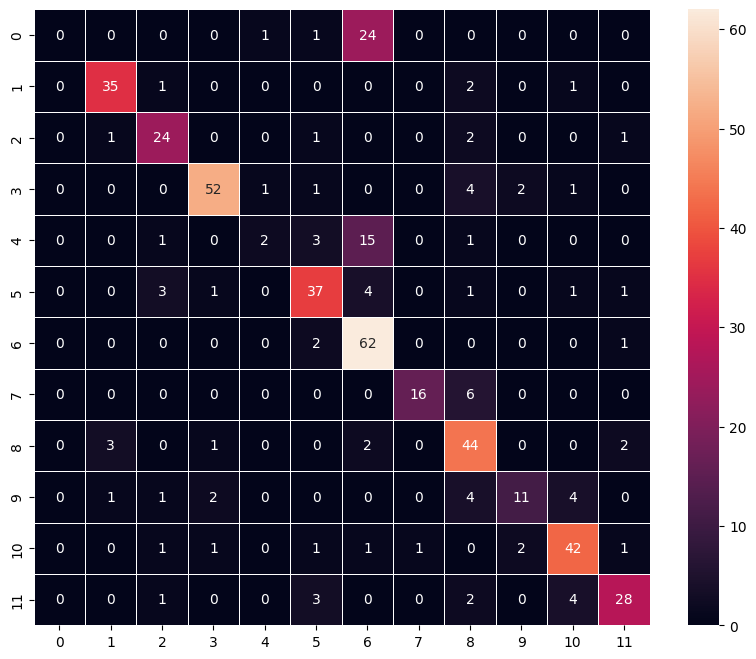

In [149]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_1 = model2.predict(X_test_normalized)
y_pred_arg1=np.argmax(y_pred_1,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

* Most of Class 0 are misclassified.
* With Data Augumenation  Class 3 prediction got improved.

### Visualizing the prediction

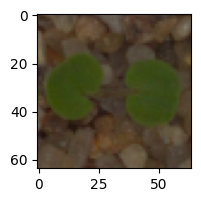

1/1 [==============================] - 0s 11ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


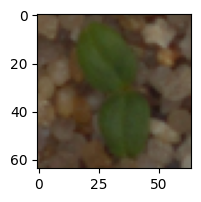

1/1 [==============================] - 0s 9ms/step
Predicted Label ['Cleavers']
True Label Cleavers


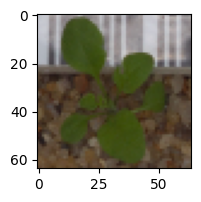

1/1 [==============================] - 0s 10ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [151]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

*

* Data Augumentation helped model to improve classification accuracy.
* ReduceLROnPlateau didn't help to increase the accuracy.
* VGG16 model learning transfer didn't help to improve the accuracy

_____